## File Handling

File handling in Python is simplified with built-in methods, which include creating, opening, and closing files. While files are open, Python additionally allows performing various file operations, such as reading, writing, and appending information.

### Some Theory
##### Types of data used for I/O:
- Text - '12345' as a sequence of unicode chars
- Binary - 12345 as a sequence of bytes of its binary equivalent

##### Hence there are 2 file types to deal with
- Text files - All program files are text files
- Binary Files - Images,music,video,exe files

#### How File I/O is done in most programming
- Open a file
- Read/Write data
- Close the file

If the file is not present then first of all use the open function and then write something in that file -->check the folder file has been created in my case sample.txt is created

In [1]:
f=open('sample.txt','w')
f.write('Hello here is abhinav')
f.close()
#since file has been closed this file will not work
f.write('HELLO')

21

In [3]:
#write multiline strings
f=open('sample1.txt','w')
f.write('heelllo hhooo')
f.write('/nmera name don hai')
f.close()

if file already present then in w mode we can write content --> purana wala content hta dega new wala add kr dega

In [4]:
#case 2-> if the file is already present
f=open('sample.txt','w')
f.write('sallaammmaaann kkkhahaannn')
f.close()

In [6]:
#problem with w mode
# introducing with append mode (add content in the last without replacing previous content)
f=open('sample.txt','a')
f.write('\nBahut badhiya action hero hai')
f.close()

In [7]:
#write multiple lines with the help of list
L=['hello\n','mera name\n','abhinav kumar hai\n']
f=open('sample.txt','w')
f.writelines(L)
f.close()

In [8]:
# reading from files using read(r)
f=open('sample.txt','r')
s=f.read()
print(s)
f.close()

hello
mera name
abhinav kumar hai



In [9]:
#reading upto n characters
f=open('sample.txt','r')
s=f.read(10)
print(s)
f.close()

hello
mera


In [11]:
#readline()--> to read line by line
f=open('sample.txt','r')
s=f.readline()
print(s)
f.close()

hello



In [12]:
# reading entire content by using the loop
f=open('sample.txt','r')

while True:
    data=f.readline()
    if data=='':
        break
    else:
        print(data,end='')
f.close()

hello
mera name
abhinav kumar hai


### Using context manager(with)

- It's a good idea to close a file after usage as it will free up the resources
- If we dont close it, garbage collector would close it
- with keyword closes the file as soon as the usage is over

In [13]:
# with --> write k sath hi file ko close kr deta hai alag se close krne ki jarurat ni hoti
with open('sample.txt','w') as f:
    f.write('selmon bhai')

In [15]:
# try f.read() now
with open('sample.txt','r') as f:
    print(f.readline())

selmon bhai


In [16]:
# moving within a file -> 10 char then 10 char
with open('sample.txt','r') as f:
    print(f.read(10))#first 10 char ko read krega fir uske bad ka char read krega 
    print(f.read(10))
    print(f.read(10))
    print(f.read(10))

selmon bha
i




In [17]:
# benefit? -> to load a big file in memory
big_L = ['hello world ' for i in range(1000)]

with open('big.txt','w') as f:
    f.writelines(big_L)


In [19]:
with open('big.txt','r') as f:

    chunk_size = 100

    while len(f.read(chunk_size)) > 0:
        print(f.read(chunk_size),end='***')
        f.read(chunk_size)

o world hello world hello world hello world hello world hello world hello world hello world hello wo***o world hello world hello world hello world hello world hello world hello world hello world hello wo***o world hello world hello world hello world hello world hello world hello world hello world hello wo***o world hello world hello world hello world hello world hello world hello world hello world hello wo***o world hello world hello world hello world hello world hello world hello world hello world hello wo***o world hello world hello world hello world hello world hello world hello world hello world hello wo***o world hello world hello world hello world hello world hello world hello world hello world hello wo***o world hello world hello world hello world hello world hello world hello world hello world hello wo***o world hello world hello world hello world hello world hello world hello world hello world hello wo***o world hello world hello world hello world hello world hello world hello

In [21]:
# seek and tell function
with open('sample1.txt','r') as f:
    f.seek(15)
    print(f.read(10))
    print(f.tell())# current index position btayega
    f.seek(0)#seek btayega kis character se start krna hai isme hai 10,12,30 kuchh bhi de skte hai
    print(f.read(10))
    print(f.tell())

mera name 
25
heelllo hh
10


In [22]:
# seek during write
with open('sample.txt','w') as f:
    f.write('Hello')
    f.seek(0)
    f.write('Xa')

### Problems with working in text mode

- can't work with binary files like images
- not good for other data types like int/float/list/tuples

In [23]:
# working with binary file
with open('prepinsta.jpg','r') as f:
    f.read()

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 301: character maps to <undefined>

In [25]:
# working with binary file
with open('prepinsta.jpg','rb') as f: #rb->read binary wb-> write binary
    with open('prepinsta_copy.jpg','wb') as wf:
        wf.write(f.read())

In [26]:
# working with other data types
with open('sample.txt','w') as f:
    f.write(5)

TypeError: write() argument must be str, not int

In [27]:
# working with other data types
with open('sample.txt','w') as f:
    f.write('5')

In [28]:
with open('sample.txt','r') as f:
    print((f.read()) + 5)

TypeError: can only concatenate str (not "int") to str

In [29]:
with open('sample.txt','r') as f:
     print(int(f.read()) + 5)

10


In [30]:
# more complex data
d = {
    'name':'nitish',
     'age':33,
     'gender':'male'
}

with open('sample.txt','w') as f:
    f.write(str(d))

In [31]:
with open('sample.txt','r') as f:
    print(dict(f.read()))

ValueError: dictionary update sequence element #0 has length 1; 2 is required

### Serialization and Deserialization

- Serialization - process of converting python data types to JSON format
- Deserialization - process of converting JSON to python data types

What is JSON--> JavaScript object Notation

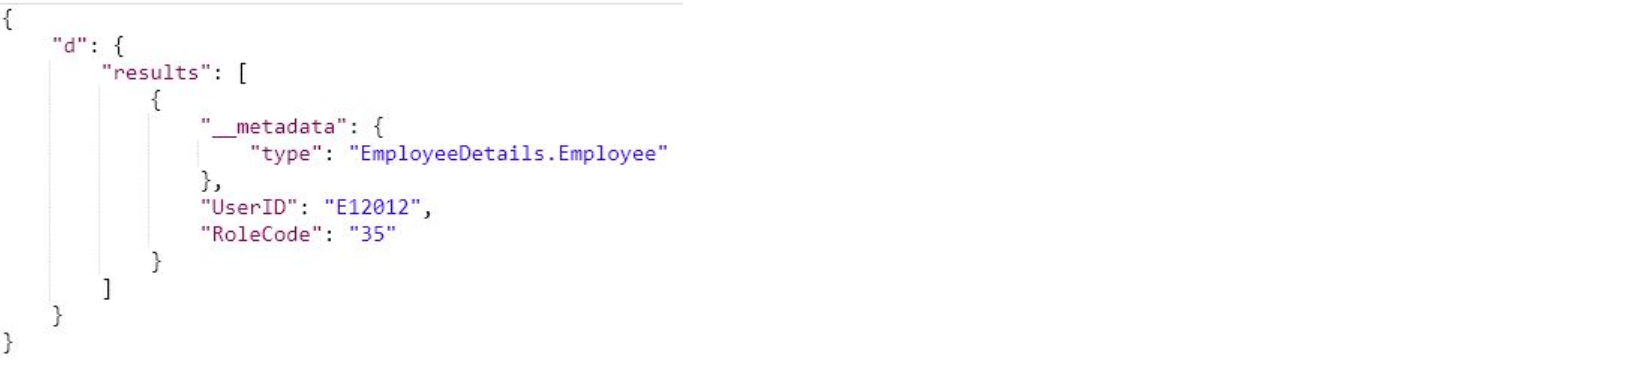

In [32]:
# serialization using json module
# list
import json

L = [1,2,3,4]

with open('demo.json','w') as f:
    json.dump(L,f)


In [33]:
# dict
d = {
    'name':'nitish',
     'age':33,
     'gender':'male'
}

with open('demo.json','w') as f:
    json.dump(d,f,indent=4)

In [34]:
# deserialization
import json

with open('demo.json','r') as f:
    d = json.load(f)
    print(d)
    print(type(d))

{'name': 'nitish', 'age': 33, 'gender': 'male'}
<class 'dict'>


In [35]:
# serialize and deserialize tuple
import json

t = (1,2,3,4,5)

with open('demo.json','w') as f:
    json.dump(t,f)

In [36]:
# serialize and deserialize a nested dict

d = {
    'student':'nitish',
     'marks':[23,14,34,45,56]
}

with open('demo.json','w') as f:
     json.dump(d,f)

### Serializing and Deserializing custom objects

In [37]:
class Person:

    def __init__(self,fname,lname,age,gender):
        self.fname = fname
        self.lname = lname
        self.age = age
        self.gender = gender

# format to printed in
# -> Nitish Singh age -> 33 gender -> male

In [38]:
person = Person('Nitish','Singh',33,'male')

In [39]:
# As a string
import json

def show_object(person):
    if isinstance(person,Person):
        return "{} {} age -> {} gender -> {}".format(person.fname,person.lname,person.age,person.gender)

with open('demo.json','w') as f:
     json.dump(person,f,default=show_object)

In [40]:
# As a dict
import json

def show_object(person):
     if isinstance(person,Person):
        return {'name':person.fname + ' ' + person.lname,'age':person.age,'gender':person.gender}

with open('demo.json','w') as f:
    json.dump(person,f,default=show_object,indent=4)

In [41]:
# deserializing
import json

with open('demo.json','r') as f:
    d = json.load(f)
    print(d)
    print(type(d))

{'name': 'Nitish Singh', 'age': 33, 'gender': 'male'}
<class 'dict'>


### Pickling

Pickling is the process whereby a Python object hierarchy is converted into a byte stream, and unpickling is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

In [42]:
class Person:

    def __init__(self,name,age):
        self.name = name
        self.age = age

    def display_info(self):
        print('Hi my name is',self.name,'and I am ',self.age,'years old')

In [43]:
p = Person('nitish',33)


In [44]:
# pickle dump
import pickle
with open('person.pkl','wb') as f:
    pickle.dump(p,f)

In [45]:
# pickle load
import pickle
with open('person.pkl','rb') as f:
    p = pickle.load(f)

p.display_info()

Hi my name is nitish and I am  33 years old


### Pickle vs JSON

Pickle lets the user to store data in binary format. JSON lets the user store data in a human-readable text format.